# Data pre-processing with GitHub Copilot
 ## Agenda
 - Import the dataset.
 - Describe the dataset.
 - Identify missing values in the dataset and impute them. 
 - Plot the data. 

### Import the dataset

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import car_sales.csv using pandas 
car_sales = pd.read_csv("car_sales.csv")

car_sales


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


### Understand your data

In [209]:
# Using pandas conduct an initial analysis of my dataframe car_sales
# Describe the dataframe
car_sales.describe()


,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [211]:
# Give me more information on the dataframe
car_sales.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [212]:
# Sum of missing values in the car_sales dataframe for each row
car_sales.isna().sum()


Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [213]:
# print rows with missing values in the car_sales DataFrame using pandas
car_sales[car_sales.isna().any(axis=1)]


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
17,Mercedes-Benz,NaN,van,240,2.2,Diesel,yes,2007,Vito
29,Mercedes-Benz,NaN,crossover,0,4.6,Petrol,yes,2016,GLS 500
39,Audi,2500.0,sedan,180,NaN,Petrol,no,2000,A4
50,Mercedes-Benz,NaN,sedan,145,3.2,Diesel,yes,2007,E-Class
55,Mercedes-Benz,NaN,crossover,0,3.0,Diesel,yes,2016,GLS 350
...,...,...,...,...,...,...,...,...,...
4254,BMW,3500.0,sedan,280,NaN,Petrol,no,1996,730
4260,BMW,NaN,crossover,0,3.0,Diesel,yes,2015,X6
4273,Volkswagen,NaN,other,197,2.0,Diesel,no,2011,T5 (Transporter)
4305,BMW,NaN,crossover,1,3.0,Diesel,yes,2014,X6


In [215]:
# remove rows with missing Price values from the car_sales DataFrame using pandas
car_sales = car_sales.dropna(subset=['Price'])


# impute the missing values of EngineV with the most frequent value in the EngineV column using pandas
car_sales['EngineV'] = car_sales['EngineV'].fillna(car_sales['EngineV'].mode()[0])




# Build a machine learning model with GitHub Copilot
## Agenda
- Getting the data ready.
- Choosing the right estimator for our problem.
- Evaluate the model.
- Improve the model. 

### Getting your data ready

In [222]:
# Convert all categorical columns in the car_sales DataFrame into numerical columns using pandas
car_sales = pd.get_dummies(car_sales, drop_first=True)
car_sales

,Price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,4200.0,277,2.0,1991,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,7900.0,427,2.9,1999,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,13300.0,358,5.0,2003,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,23000.0,240,4.2,2007,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,18300.0,120,2.0,2011,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4340,125000.0,9,3.0,2014,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4341,6500.0,1,3.5,1999,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4342,8000.0,194,2.0,1985,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4343,14200.0,31,2.0,2014,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [223]:
# Create a feature matrix x from the car_sales DataFrame using all columns except Price
# create Y target vector from the car_sales DataFrame using the Price column

X = car_sales.drop('Price', axis=1)
y = car_sales['Price']


# split the car_sales DataFrame into training and testing sets using scikit-learn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




### Choosing the right estimator for our problem

In [224]:
# using scikit-learn create a RandomForestRegressor model and train it on the training data
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

# list hyperparameters of the RandomForestRegressor model
model.get_params()






{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Evaluate the Model

In [225]:
# make predictions using the model
y_preds = model.predict(X_test)


# evaluate the model using the mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_preds)

  

# evaluate the model using the score method
model.score(X_test, y_test)


0.6813807811863164

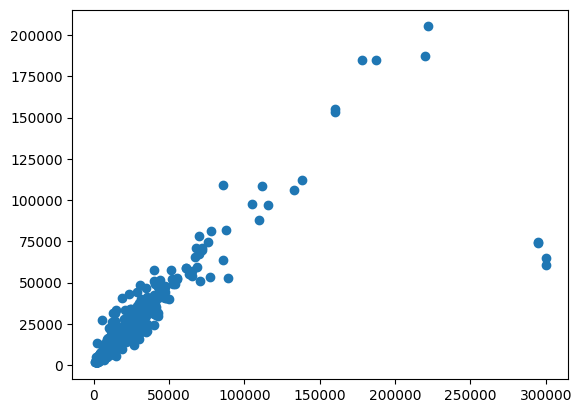

In [226]:
# create a scatter plot of the test data and the predictions  
plt.scatter(y_test, y_preds)
